# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [2]:
os.chdir(r"C:\Users\USER\Downloads")

# Importing dataset

In [3]:
data=pd.read_csv("day (2).csv")

In [4]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
data.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#  Checking missing values

In [6]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data contains no missing value.

# Analysing continous Variables

In [7]:
data_cont=["temp","atemp","hum","windspeed","casual","registered","cnt"]

## 1. Correlation

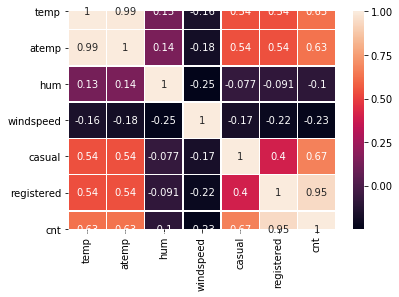

In [8]:
cor=data[data_cont].corr()
sns.heatmap(cor,annot=True,linewidths=0.5)

Columns registerd, casual are highly corelated to cnt variable.
The column temp and atemp are highly corelated.

In [9]:
data.drop(["atemp","casual","registered"],axis=1,inplace=True)

## 2. Treating Outliers

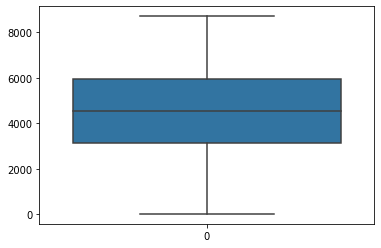

In [10]:
sns.boxplot(data=data["cnt"])

The cnt column does not contain any outlier.

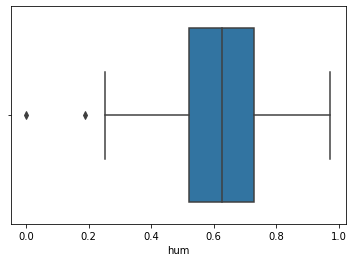

In [11]:
sns.boxplot(data["hum"])

In [12]:
Q1=data["hum"].quantile(0.25)
Q3=data["hum"].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-(1.5*IQR)
Upper_Whisker = Q3+(1.5*IQR)

print(Q1,Q3,IQR,Lower_Whisker,Upper_Whisker)

0.52 0.7302085 0.21020850000000002 0.20468725 1.0455212500000002


In [13]:
data.loc[data.hum<Lower_Whisker,"hum"]=np.nan
data.fillna(data["hum"].mean(),inplace=True)

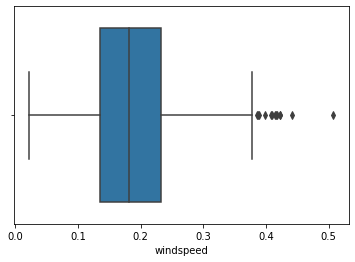

In [14]:
sns.boxplot(x="windspeed",data=data)

In [15]:
Q1=data["windspeed"].quantile(0.25)
Q3=data["windspeed"].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-(1.5*IQR)
Upper_Whisker = Q3+(1.5*IQR)

print(Q1,Q3,IQR,Lower_Whisker,Upper_Whisker)

0.13495 0.2332145 0.0982645 -0.012446750000000034 0.38061125


In [16]:
data["windspeed"].describe()

count    731.000000
mean       0.190486
std        0.077498
min        0.022392
25%        0.134950
50%        0.180975
75%        0.233214
max        0.507463
Name: windspeed, dtype: float64

In [17]:
data.loc[data.windspeed>Upper_Whisker,"windspeed"]=np.nan
data.fillna(data["windspeed"].mean(),inplace=True)

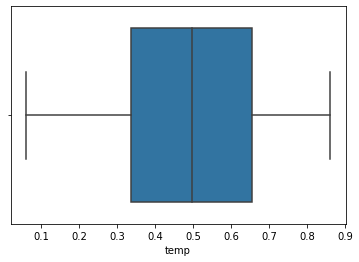

In [18]:
sns.boxplot(data["temp"])

temp column does not contain any outlier.

# Analyzing Categorical Variables

In [19]:
data["dteday"]=pd.to_datetime(data.dteday)

In [20]:
data_cat=["season","yr","mnth","holiday","weekday","weathersit","workingday"]

In [21]:
data['season']=data.season.astype('category')
data['yr']=data.yr.astype('category')
data['mnth']=data.mnth.astype('category')
data['holiday']=data.holiday.astype('category')
data['weekday']=data.weekday.astype('category')
data['workingday']=data.workingday.astype('category')
data['weathersit']=data.weathersit.astype('category')

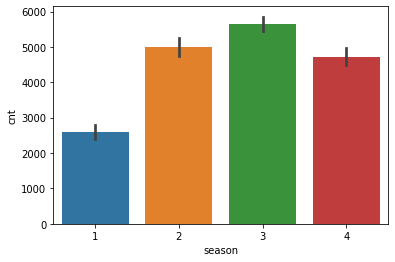

In [22]:
sns.barplot(x="season",y="cnt",data=data)

Bar plot of "Count of bikes based on Season".
The plot indicates that the bike rent count is most in fall and least in spring season.

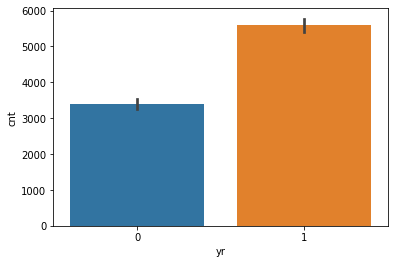

In [23]:
sns.barplot(x="yr",y="cnt",data=data)

Bar plot of "Count of bike rent based on Year" indicates that there are more rent of bikes in Year 2012 than in 2011.

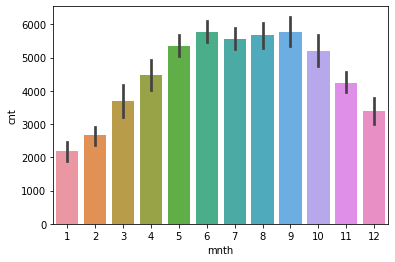

In [24]:
sns.barplot(x="mnth",y="cnt",data=data)

Bar plot of " Count of bike rent based on Months" indicate that bike rent increases from 1st to 6th and then decreases from 9th to 12th month.

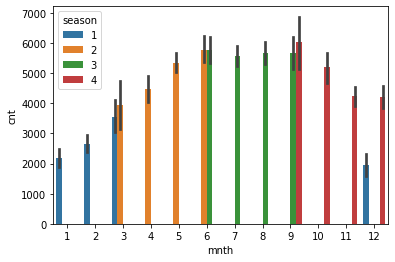

In [25]:
sns.barplot(x="mnth",y="cnt",data=data[["mnth","season","cnt"]],hue="season")

Bar plot of " Count of bike rent based on Month and Season" indicates that season and mnth are related to each other and have same impact on bike rental counts.

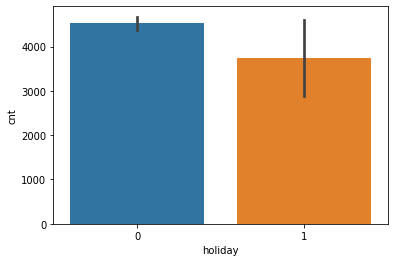

In [26]:
sns.barplot(x="holiday",y="cnt",data=data)

Barplot of " Holiday and Count " indicates that there are more bike rental counts on holiday.

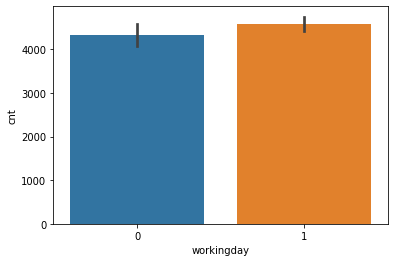

In [27]:
sns.barplot(x="workingday",y="cnt",data=data)

Barplot of " Working Day based on bike rental Count "  indicate that working day gets more bike rents.

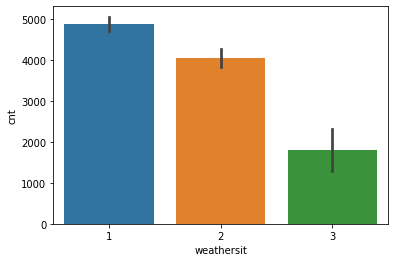

In [28]:
sns.barplot(x="weathersit",y="cnt",data=data)

Barplot of "Weather based on Count of bike rents " indicate that during clear,partly cloudy weather the bike rental count is highest and the second highest is during mist cloudy weather and followed by third highest during light snow and light rain weather.

# Selecting target and dependent variables

In [29]:
data.drop(["dteday","instant"],axis=1,inplace=True)

In [30]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [31]:
X=data.iloc[:,:-1].values
print(X)

[[1 0 1 ... 0.344167 0.805833 0.160446]
 [1 0 1 ... 0.363478 0.696087 0.24853899999999998]
 [1 0 1 ... 0.196364 0.43727299999999997 0.248309]
 ...
 [1 1 12 ... 0.253333 0.7529170000000001 0.124383]
 [1 1 12 ... 0.255833 0.483333 0.350754]
 [1 1 12 ... 0.215833 0.5775 0.154846]]


In [32]:
Y=data.iloc[:,-1].values
print(Y)

[ 985  801 1349 1562 1600 1606 1510  959  822 1321 1263 1162 1406 1421
 1248 1204 1000  683 1650 1927 1543  981  986 1416 1985  506  431 1167
 1098 1096 1501 1360 1526 1550 1708 1005 1623 1712 1530 1605 1538 1746
 1472 1589 1913 1815 2115 2475 2927 1635 1812 1107 1450 1917 1807 1461
 1969 2402 1446 1851 2134 1685 1944 2077  605 1872 2133 1891  623 1977
 2132 2417 2046 2056 2192 2744 3239 3117 2471 2077 2703 2121 1865 2210
 2496 1693 2028 2425 1536 1685 2227 2252 3249 3115 1795 2808 3141 1471
 2455 2895 3348 2034 2162 3267 3126  795 3744 3429 3204 3944 4189 1683
 4036 4191 4073 4400 3872 4058 4595 5312 3351 4401 4451 2633 4433 4608
 4714 4333 4362 4803 4182 4864 4105 3409 4553 3958 4123 3855 4575 4917
 5805 4660 4274 4492 4978 4677 4679 4758 4788 4098 3982 3974 4968 5312
 5342 4906 4548 4833 4401 3915 4586 4966 4460 5020 4891 5180 3767 4844
 5119 4744 4010 4835 4507 4790 4991 5202 5305 4708 4648 5225 5515 5362
 5119 4649 6043 4665 4629 4592 4040 5336 4881 4086 4258 4342 5084 5538
 5923 

# Encoding categorical data

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,2,4,6])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [34]:
X.shape

(731, 32)

In [35]:
print(X)

[[1.0 0.0 0.0 ... 0.344167 0.805833 0.160446]
 [1.0 0.0 0.0 ... 0.363478 0.696087 0.24853899999999998]
 [1.0 0.0 0.0 ... 0.196364 0.43727299999999997 0.248309]
 ...
 [1.0 0.0 0.0 ... 0.253333 0.7529170000000001 0.124383]
 [1.0 0.0 0.0 ... 0.255833 0.483333 0.350754]
 [1.0 0.0 0.0 ... 0.215833 0.5775 0.154846]]


# Splitting into Training and Testing data

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)

# Training Model ( Multiple Linear Regression )

In [37]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_pred=reg.predict(X_test)

## Predicting output with multiple linear regression 

In [39]:
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten()})     
df

,Actual,Predicted
0,3053,2753.5
1,6779,6616.0
2,1529,3119.0
3,7570,6656.0
4,8167,7081.0
...,...,...
142,3577,3129.0
143,4451,3643.5
144,6889,7276.0
145,4068,3640.0


In [40]:
reg.score(X_train,Y_train)

0.8460995188660222

In [41]:
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [42]:
r2=r2_score(Y_test,y_pred)
mse=math.sqrt(mean_squared_error(Y_test,y_pred))
mae=mean_absolute_error(Y_test,y_pred)
print("R2 Score = ",r2)
print("Mean Sq Error = ",mse)
print("Mean Absolute error = ",mae)

R2 Score =  0.8269058579358015
Mean Sq Error =  827.1930519764387
Mean Absolute erroe =  637.295918367347


#  Training Model ( Random Forest Regression )

In [43]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [44]:
y_pred_random=regressor.predict(X_test)

## Predicting output with RandomForestRegression

In [45]:
df = pd.DataFrame({'Actual': y_pred_random.flatten(), 'Predicted': y_pred.flatten()})     
df

,Actual,Predicted
0,3221.29,2753.5
1,6943.00,6616.0
2,2704.06,3119.0
3,6491.13,6656.0
4,7524.46,7081.0
...,...,...
142,3453.16,3129.0
143,3849.95,3643.5
144,7594.64,7276.0
145,3989.54,3640.0


In [46]:
r2=r2_score(Y_test,y_pred_random)
mse=math.sqrt(mean_squared_error(Y_test,y_pred_random))
mae=mean_absolute_error(Y_test,y_pred_random)
print("R2 Score = ",r2)
print("Mean Sq Error = ",mse)
print("Mean Absolute error = ",mae)

R2 Score =  0.9049025778178187
Mean Sq Error =  613.1264685662026
Mean Absolute error =  459.6505442176871


Comparison Of Both the models

Multiple Linear Regression
R2 Score =  0.8269058579358015
Mean Sq Error =  827.1930519764387
Mean Absolute erroe =  637.295918367347

Random Forest Regression
R2 Score =  0.9049025778178187
Mean Sq Error =  613.1264685662026
Mean Absolute error =  459.6505442176871

Hence, Random forest out performs multiple linear regression.